In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\jam\Desktop\ML\life expectancy prediction\Life Expectancy Data.csv")
df.sample(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
74,Antigua and Barbuda,2005,Developing,74.6,147.0,0,8.15,1455.608186,99.0,0,...,98.0,4.41,99.0,0.1,11371.93895,NaN,3.5,3.4,0.000,0.0
1254,Ireland,2011,Developed,84.0,7.0,0,11.72,6386.954370,95.0,285,...,95.0,8.15,95.0,0.1,52567.52568,4576794.0,0.3,0.2,0.909,18.5
2441,Sri Lanka,2015,Developing,74.9,138.0,3,NaN,0.000000,99.0,1568,...,99.0,NaN,99.0,0.1,3844.89123,2966.0,15.1,15.0,0.764,14.0


In [3]:
df.columns
df = df.dropna()

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])
print(df["Country"].value_counts)


<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
       ... 
2933    132
2934    132
2935    132
2936    132
2937    132
Name: Country, Length: 1649, dtype: int64>


In [6]:
encoder1 = LabelEncoder()
df['Status'] = encoder.fit_transform(df['Status'])
print(df["Status"].value_counts)

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Status, Length: 1649, dtype: int64>


In [7]:
target =[]
for i in df.columns :
    if i =='Life expectancy':
        target.append(i) 
df.columns = df.columns.str.strip() 
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
df.shape

(1649, 22)

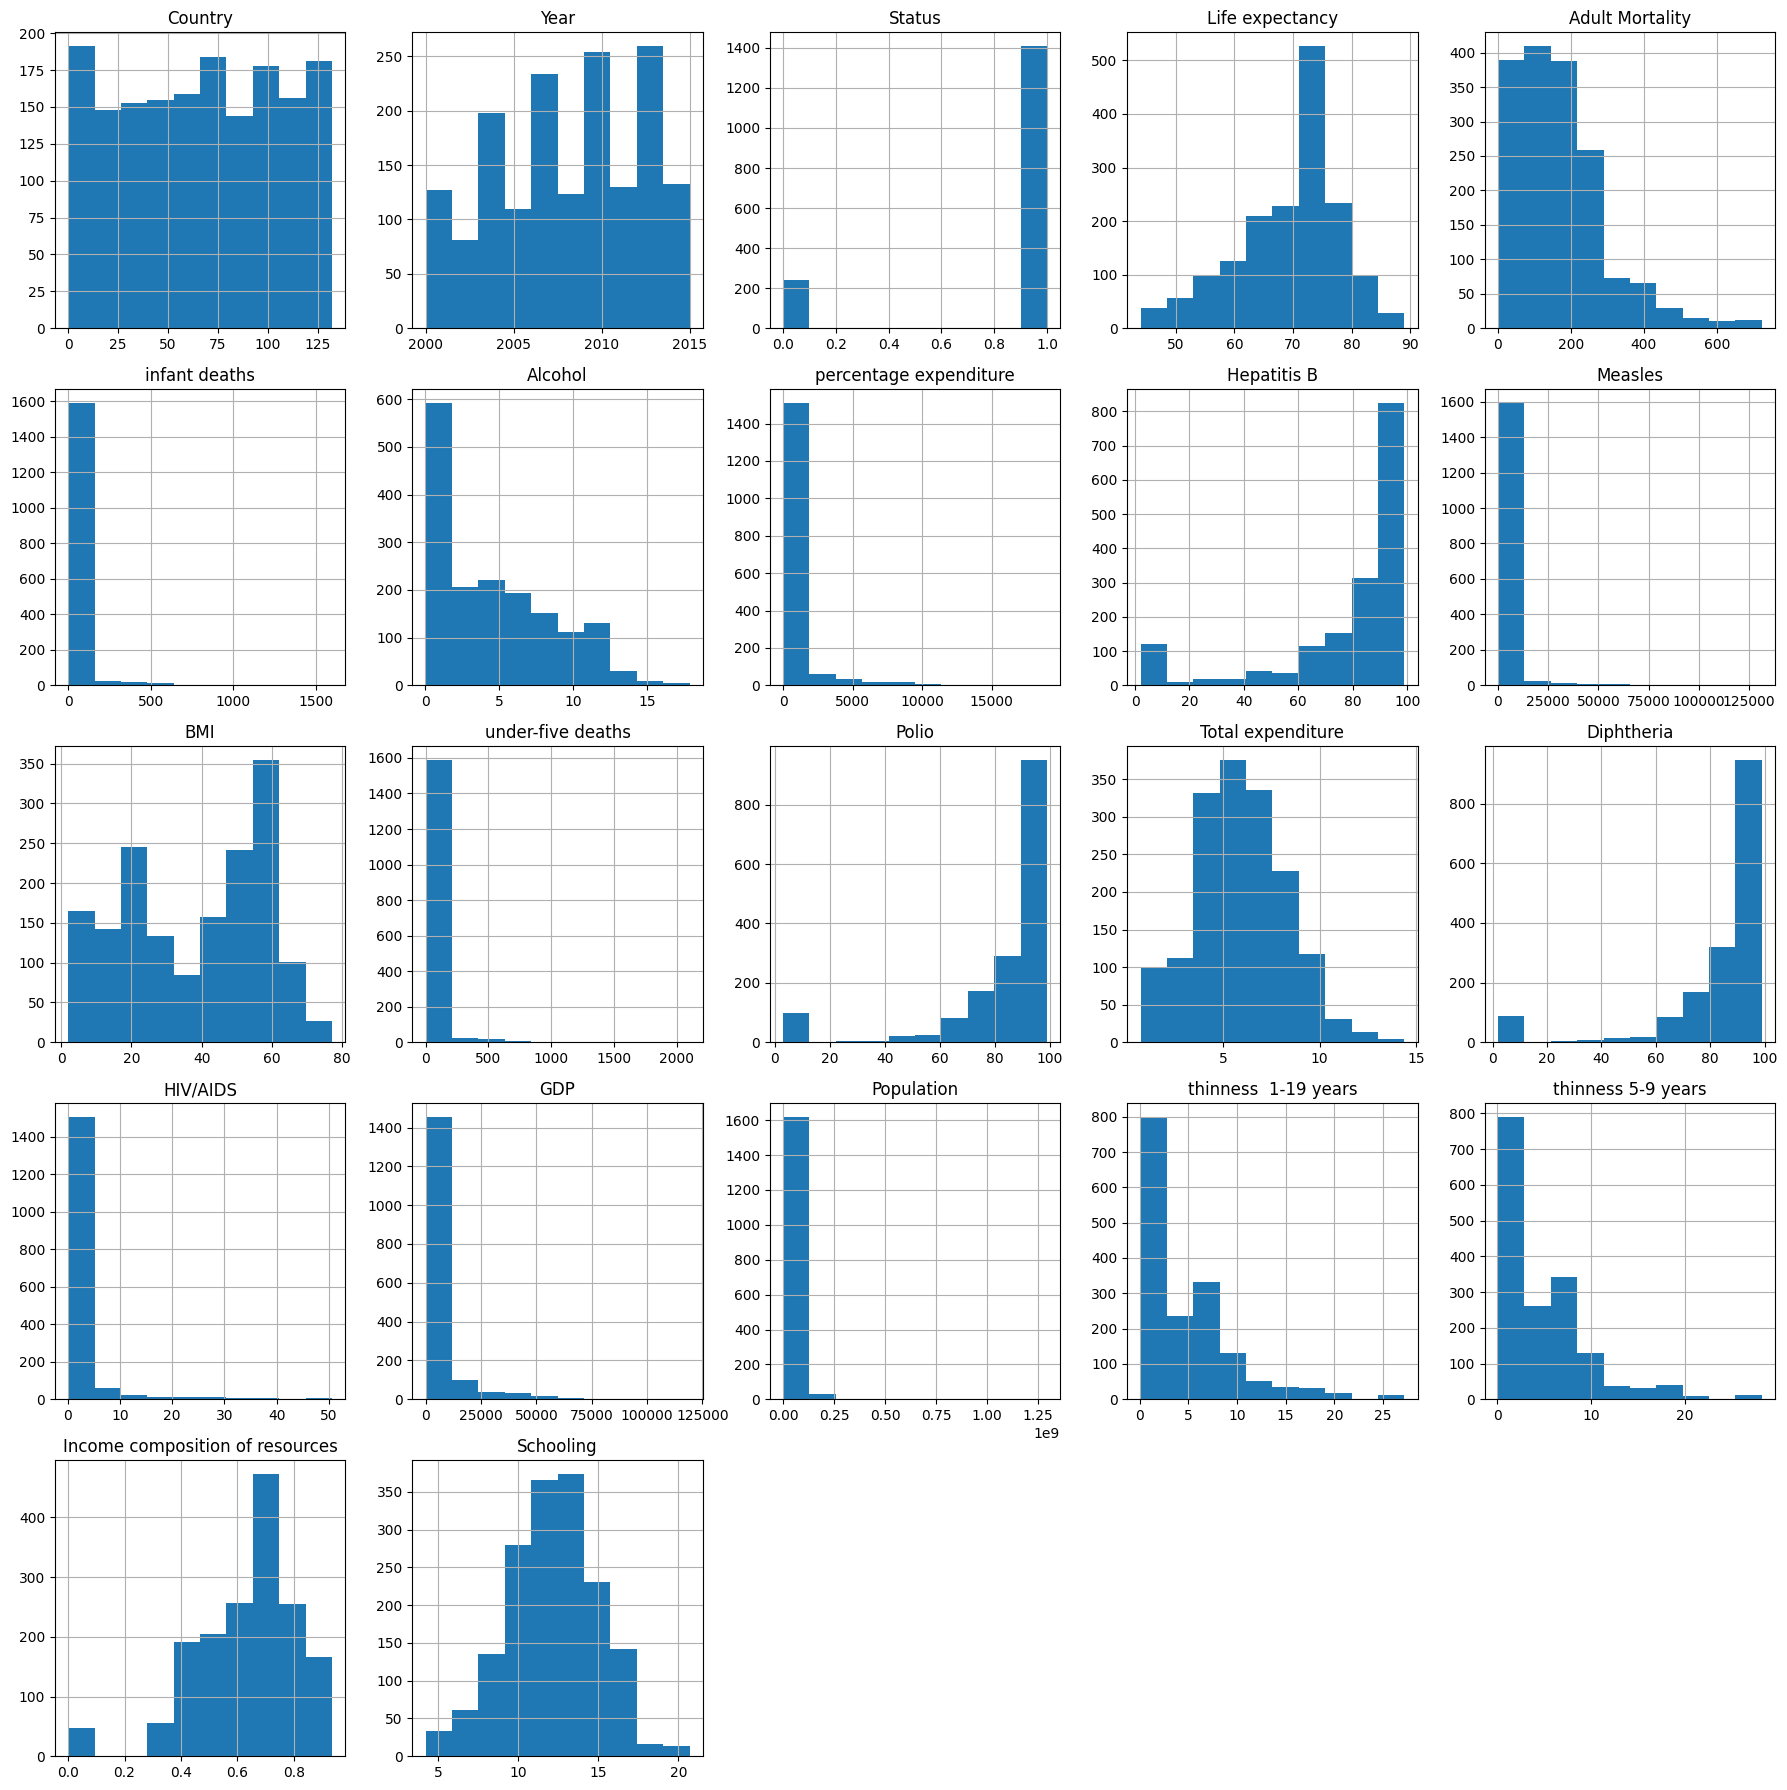

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(figsize=(18, 18))
plt.tight_layout()
plt.show()

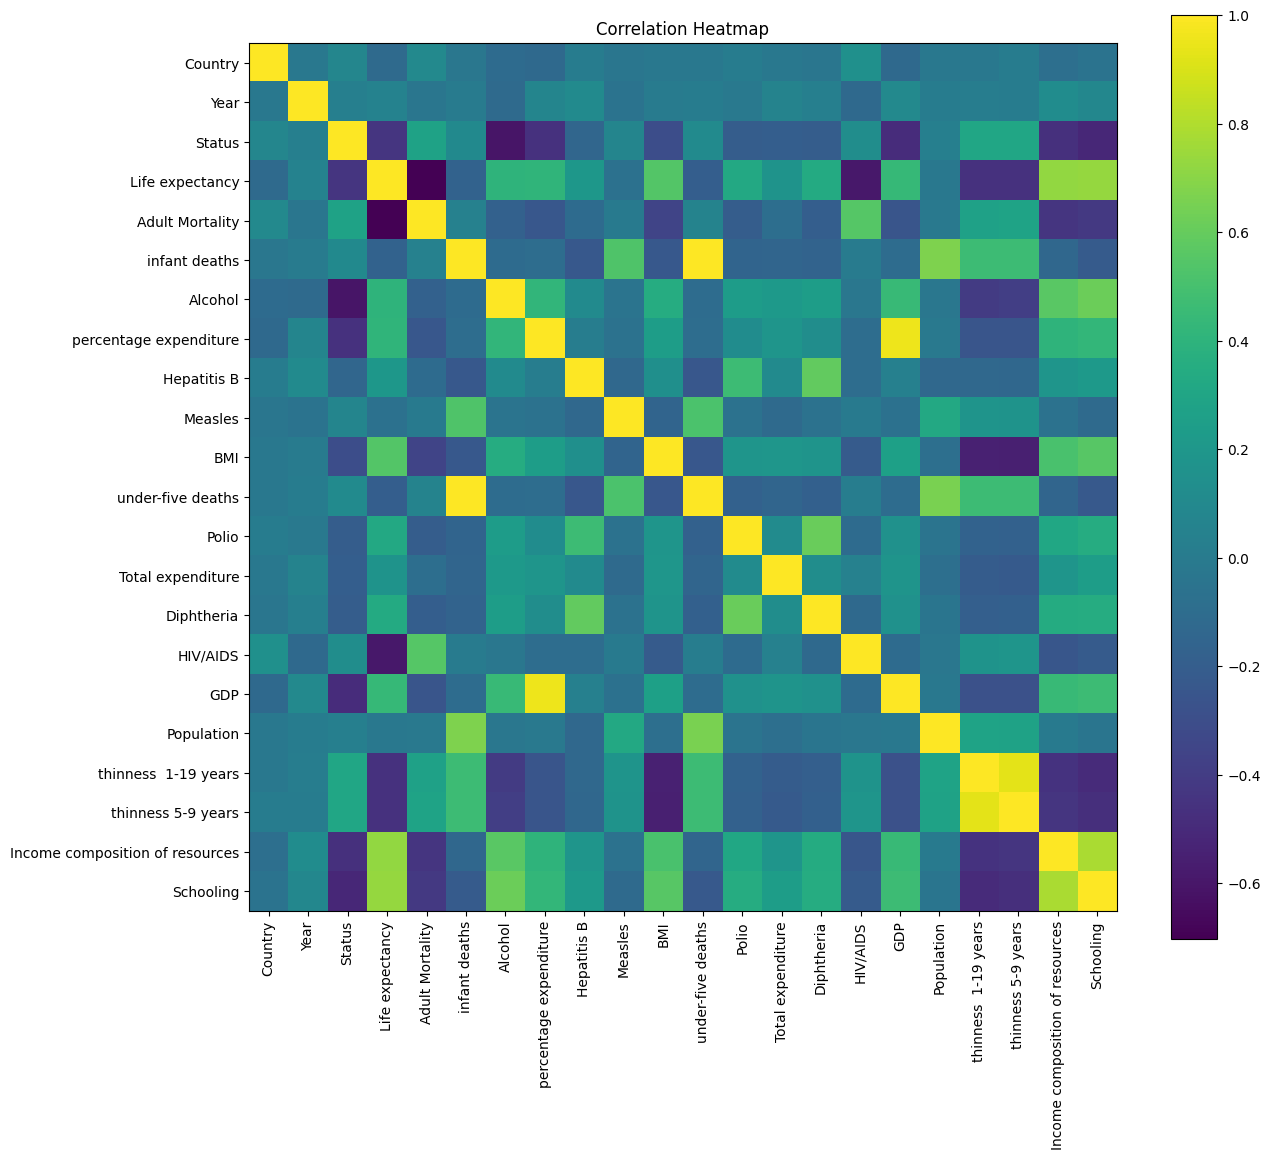

In [10]:
plt.figure(figsize=(14, 12))
plt.imshow(df[numeric_cols].corr(), interpolation="nearest")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show(
   
    
)

In [11]:
import seaborn as sns

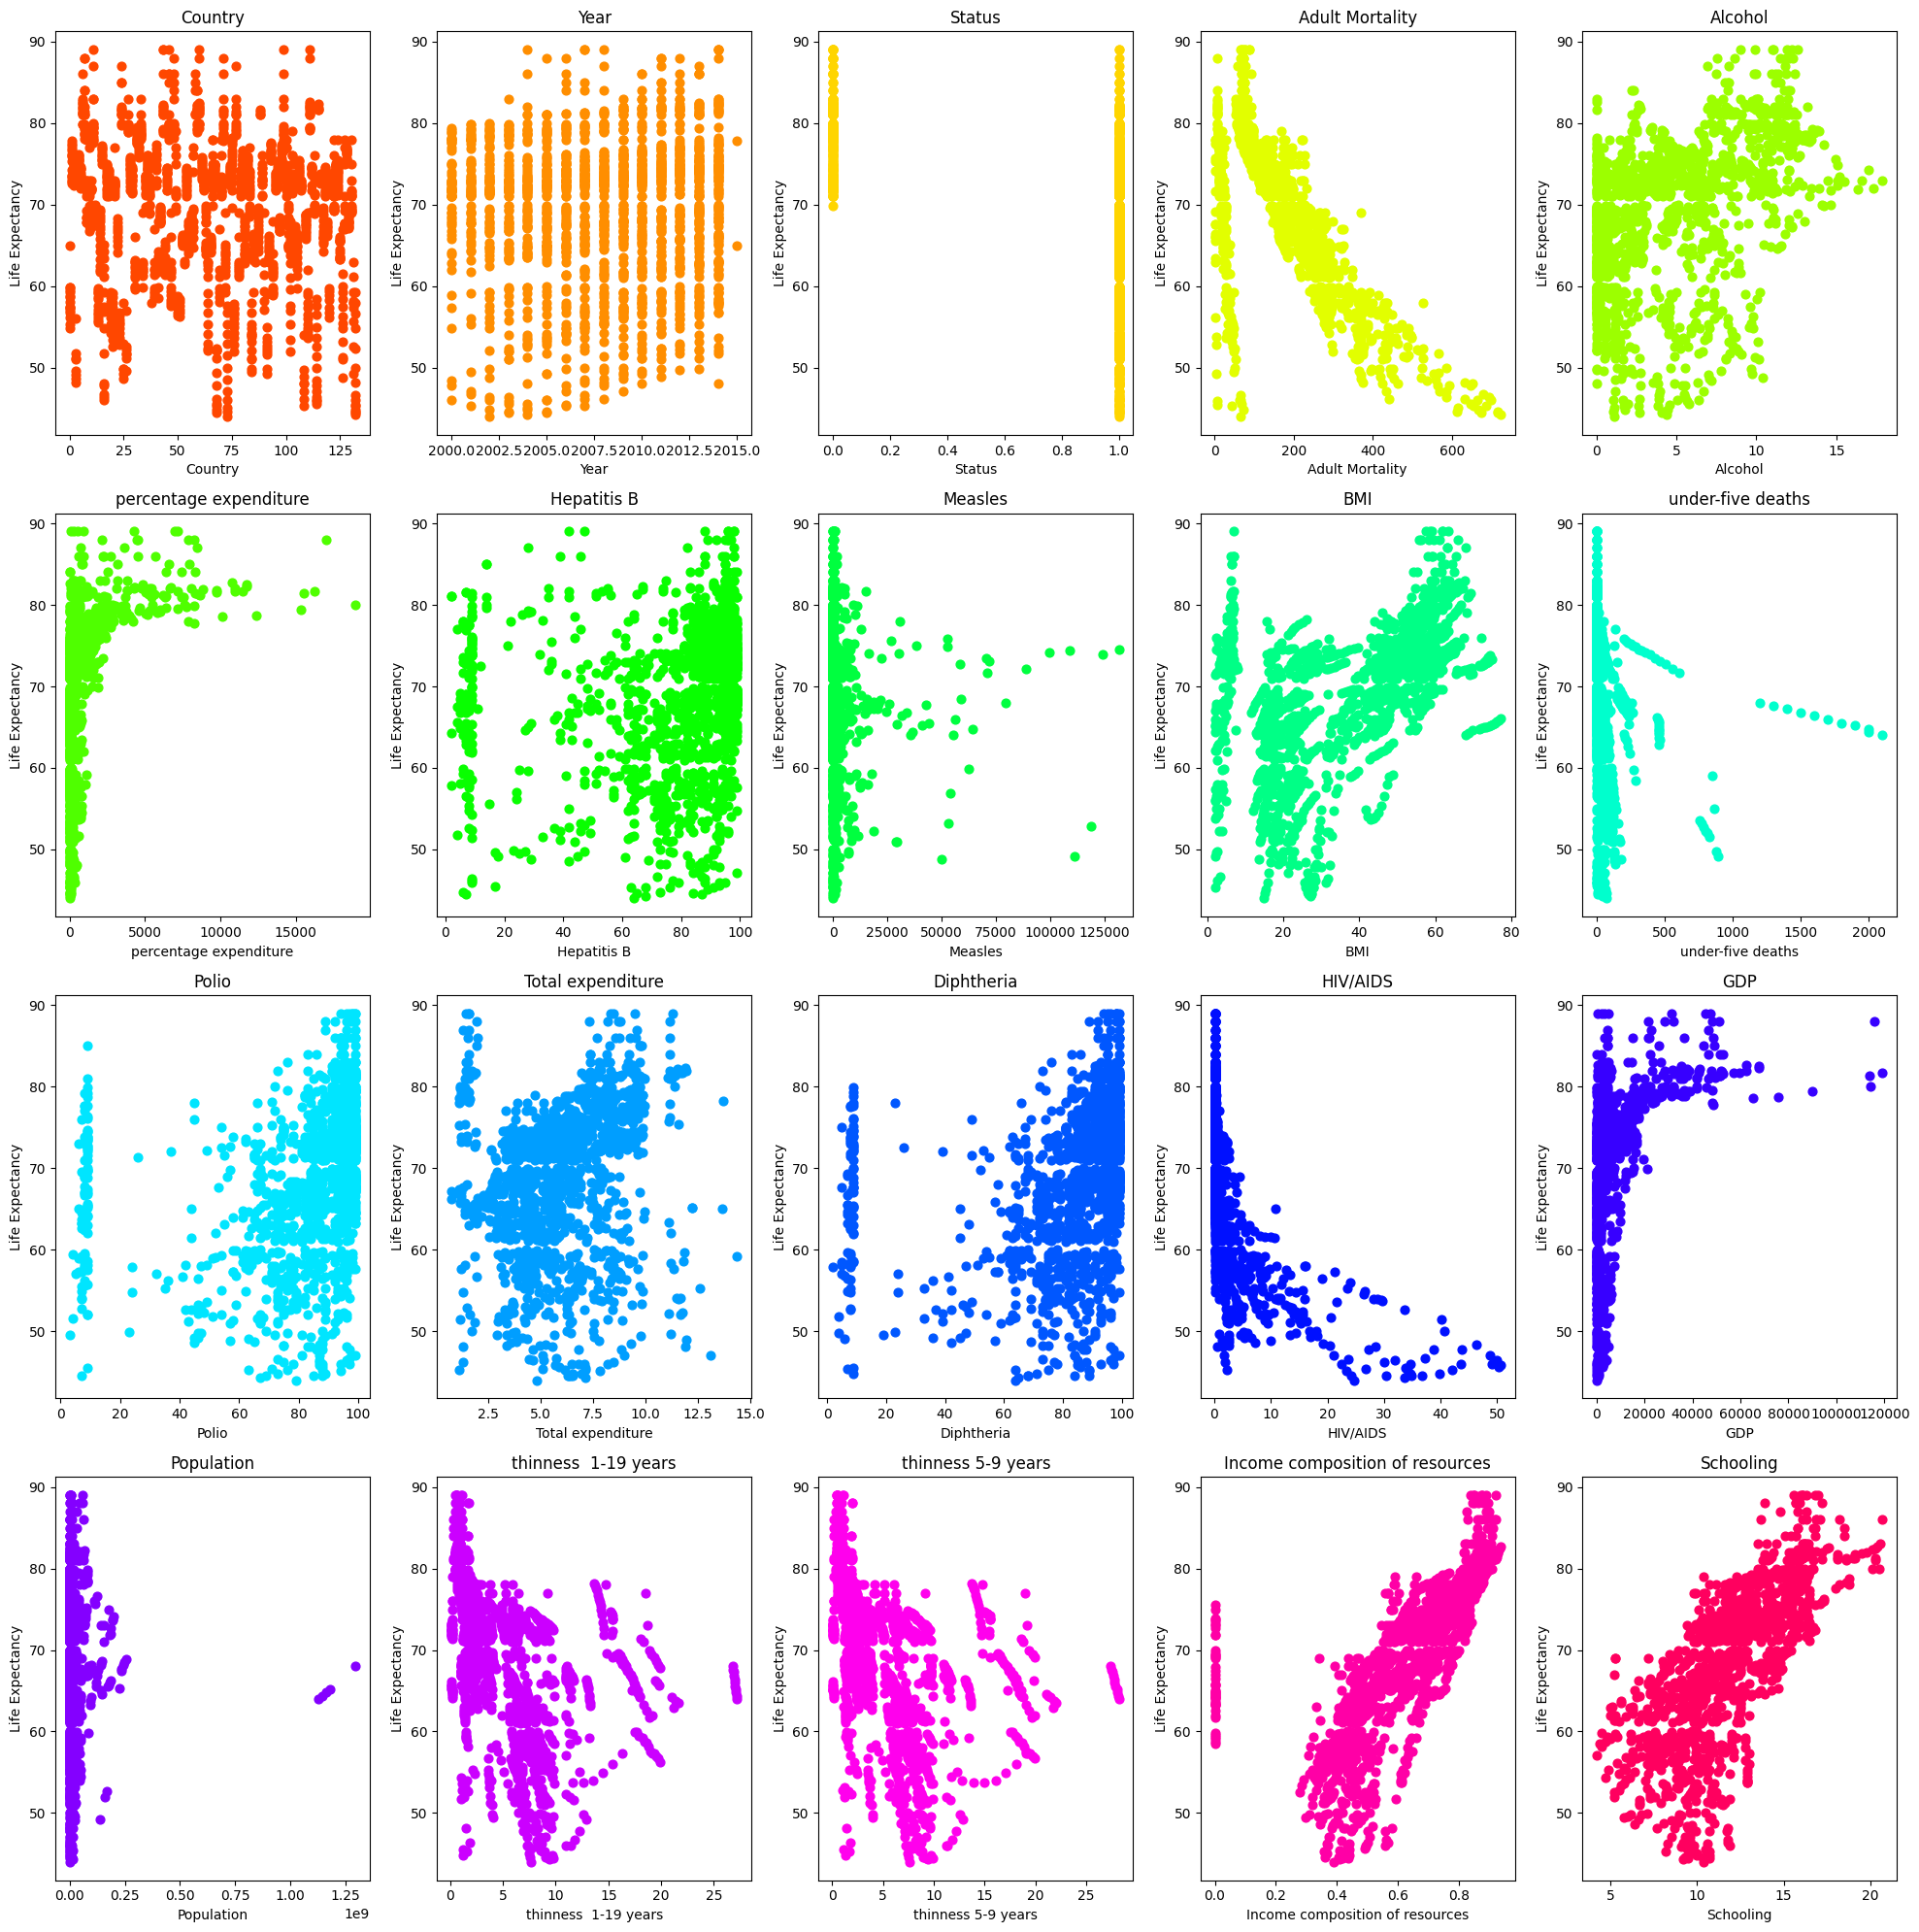

In [12]:
features = ['Country', 'Year', 'Status', 'Adult Mortality', 'Alcohol', 'percentage expenditure', 
            'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
            'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
            'thinness 5-9 years', 'Income composition of resources', 'Schooling']

target = "Life expectancy"
rows = 4
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

colors = sns.color_palette("hsv", len(features))  

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df[target], s=40, color=colors[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Life Expectancy")
    axes[i].set_title(f"{feature}")

plt.tight_layout()
plt.show()


In [13]:
df = df.drop(columns=['infant deaths'])


In [14]:
df = df.drop(columns=['percentage expenditure'])


In [15]:
x = df.drop(target , axis=1)
y = df[target].values.ravel()


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.3 , random_state=4)
print(x.shape)
print(y.shape)

(1649, 19)
(1649,)


In [18]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)
x_train

array([[-1.48541872,  0.75992481,  0.40120543, ...,  3.11395365,
        -0.42751881, -0.97670883],
       [-1.17555371, -0.46589743,  0.40120543, ...,  0.74672106,
        -0.15771973, -0.07376879],
       [-1.02062121,  0.02443147,  0.40120543, ..., -0.86039098,
         0.94263728,  1.11811206],
       ...,
       [-0.81404454,  0.75992481,  0.40120543, ..., -0.36088318,
         0.40832931,  0.32352482],
       [-1.40795247, -1.20139078,  0.40120543, ..., -0.27401226,
         0.30781592,  0.03458401],
       [ 0.68363631, -1.44655523,  0.40120543, ..., -0.57806049,
         0.52471322,  0.17905442]], shape=(1154, 19))

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def score(x_train,x_test,y_train,y_test,y_pred ):
    mse = mean_squared_error(y_test, y_pred)           
    mae = mean_absolute_error(y_test, y_pred)         
    r2 = r2_score(y_test, y_pred)                     

    print(round (f" train score: {reg.score(x_train,y_train),2}"))
    print           
    print(round(reg.score(x_test,y_test),2))
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared Score: {r2:.2f}")

In [22]:
score(y_test,y_pred)

TypeError: score() missing 3 required positional arguments: 'y_train', 'y_test', and 'y_pred'

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
reg2 = LinearRegression()
cvscore = cross_val_score(reg,x,y,cv=5)
cvscore

array([0.82421661, 0.71955679, 0.83074168, 0.7713581 , 0.78228574])